In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [2]:
data_dir = r"C:\Users\jagad\Rice Leaf Disease Images"

In [3]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS = 3
EPOCHS = 10
NUM_CLASSES = 4

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 5932 files belonging to 4 classes.


In [5]:
class_names= dataset.class_names
print(class_names)

['Bacterialblight', 'Blast', 'Brownspot', 'Tungro']


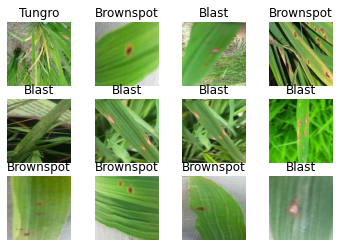

In [6]:
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [7]:
train_size = int(len(dataset) * 0.8)
val_size = int(len(dataset) * 0.1)
test_size = len(dataset) - train_size - val_size

In [8]:
train_ds = dataset.take(train_size)
val_ds = dataset.skip(train_size).take(val_size)
test_ds = dataset.skip(train_size + val_size)

In [9]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [10]:
train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y)).prefetch(buffer_size=tf.data.AUTOTUNE)


In [11]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1./255),
])

In [12]:
simple_cnn = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(NUM_CLASSES, activation='softmax'),
])


In [13]:
simple_cnn.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

In [70]:
simple_cnn.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
148/148 [==============================] - 258s 2s/step - loss: 1.0764 - accuracy: 0.5135 - val_loss: 0.9304 - val_accuracy: 0.6441
Epoch 2/10
148/148 [==============================] - 242s 2s/step - loss: 0.7379 - accuracy: 0.7164 - val_loss: 0.6078 - val_accuracy: 0.7708
Epoch 3/10
148/148 [==============================] - 249s 2s/step - loss: 0.5259 - accuracy: 0.7956 - val_loss: 0.4390 - val_accuracy: 0.8333
Epoch 4/10
148/148 [==============================] - 248s 2s/step - loss: 0.4000 - accuracy: 0.8488 - val_loss: 0.3818 - val_accuracy: 0.8420
Epoch 5/10
148/148 [==============================] - 247s 2s/step - loss: 0.3001 - accuracy: 0.8837 - val_loss: 0.3291 - val_accuracy: 0.8681
Epoch 6/10
148/148 [==============================] - 248s 2s/step - loss: 0.2827 - accuracy: 0.8961 - val_loss: 0.4723 - val_accuracy: 0.8177
Epoch 7/10
148/148 [==============================] - 248s 2s/step - loss: 0.2154 - accuracy: 0.9202 - val_loss: 0.1357 - val_accuracy: 0.9497

In [43]:
simple_cnn.save(r"C:\Users\jagad\Simple_cnn")

INFO:tensorflow:Assets written to: C:\Users\jagad\Simple_cnn\assets


INFO:tensorflow:Assets written to: C:\Users\jagad\Simple_cnn\assets


In [14]:
import numpy as np
simple_cnn= tf.keras.models.load_model(r"C:\Users\jagad\Simple_cnn") 
test_loss, test_accuracy = simple_cnn.evaluate(test_ds)

print('Test Accuracy:', test_accuracy)

# Make predictions on the test set
y_true = []
y_pred = []

for images, labels in test_ds:
    predictions = simple_cnn.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(predictions, axis=1))



20/20 [==============================] - 13s 363ms/step - loss: 0.0827 - accuracy: 0.9742
Test Accuracy: 0.9741935729980469
1/1 [==============================] - 0s 315ms/step


In [15]:
# Compute other evaluation metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report

precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')
accuracy = accuracy_score(y_true, y_pred)

print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)
print('Accuracy:', accuracy)

Precision: 0.9738049894057108
Recall: 0.9743876673986608
F1-score: 0.973377471832918
Accuracy: 0.9725806451612903


In [16]:
class_names = ['Bacterialblight', 'Blast', 'Brownspot', 'Tungro']  # Add your class names
print(classification_report(y_true, y_pred, target_names=class_names))

                 precision    recall  f1-score   support

Bacterialblight       0.99      0.98      0.98       160
          Blast       0.92      0.99      0.95       152
      Brownspot       1.00      0.93      0.96       172
         Tungro       0.99      0.99      0.99       136

       accuracy                           0.97       620
      macro avg       0.97      0.97      0.97       620
   weighted avg       0.97      0.97      0.97       620



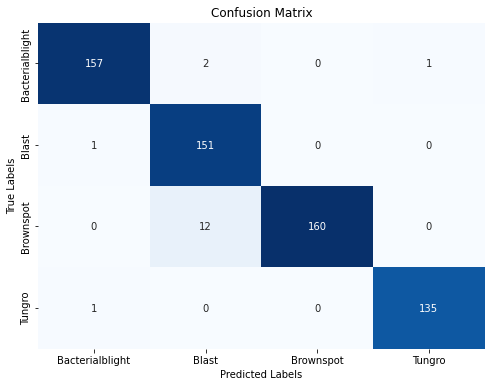

In [17]:
# Generate confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [18]:
lenet_model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(16, kernel_size=(5, 5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(120, activation='relu'),
    layers.Dense(84, activation='relu'),
    layers.Dense(NUM_CLASSES, activation='softmax')
])

In [19]:
lenet_model.compile(optimizer='adam',
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

In [27]:
history_lenet = lenet_model.fit(train_ds, validation_data=val_ds, epochs=EPOCHS)

Epoch 1/10
148/148 [==============================] - 113s 749ms/step - loss: 1.0224 - accuracy: 0.6033 - val_loss: 0.7886 - val_accuracy: 0.7101
Epoch 2/10
148/148 [==============================] - 110s 740ms/step - loss: 0.6098 - accuracy: 0.7669 - val_loss: 0.4757 - val_accuracy: 0.8438
Epoch 3/10
148/148 [==============================] - 112s 756ms/step - loss: 0.4313 - accuracy: 0.8418 - val_loss: 0.3046 - val_accuracy: 0.8837
Epoch 4/10
148/148 [==============================] - 110s 741ms/step - loss: 0.3177 - accuracy: 0.8799 - val_loss: 0.2366 - val_accuracy: 0.9167
Epoch 5/10
148/148 [==============================] - 108s 727ms/step - loss: 0.2437 - accuracy: 0.9113 - val_loss: 0.2104 - val_accuracy: 0.9149
Epoch 6/10
148/148 [==============================] - 108s 729ms/step - loss: 0.2002 - accuracy: 0.9229 - val_loss: 0.1944 - val_accuracy: 0.9340
Epoch 7/10
148/148 [==============================] - 110s 741ms/step - loss: 0.1677 - accuracy: 0.9398 - val_loss: 0.0858 -

In [28]:
lenet_model.save(r"C:\Users\jagad\Lenet")

INFO:tensorflow:Assets written to: C:\Users\jagad\Lenet\assets


INFO:tensorflow:Assets written to: C:\Users\jagad\Lenet\assets


In [52]:
lenet_model= tf.keras.models.load_model(r"C:\Users\jagad\Lenet")
test_loss, test_accuracy = lenet_model.evaluate(test_ds)

print('Test Accuracy:', test_accuracy)

# Make predictions on the test set
y_true = []
y_pred = []

for images, labels in test_ds:
    predictions = lenet_model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(predictions, axis=1))



20/20 [==============================] - 8s 169ms/step - loss: 0.1572 - accuracy: 0.9435
Test Accuracy: 0.9435483813285828
1/1 [==============================] - 0s 216ms/step


In [53]:
# Compute other evaluation metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report

precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')
accuracy = accuracy_score(y_true, y_pred)

print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)
print('Accuracy:', accuracy)

Precision: 0.9551000272315782
Recall: 0.9526059272883506
F1-score: 0.9530507238462465
Accuracy: 0.9532258064516129


In [54]:
class_names = ['Bacterialblight', 'Blast', 'Brownspot', 'Tungro']  # Add your class names
print(classification_report(y_true, y_pred, target_names=class_names))

                 precision    recall  f1-score   support

Bacterialblight       0.95      0.97      0.96       162
          Blast       0.96      0.87      0.91       151
      Brownspot       0.93      0.99      0.96       167
         Tungro       0.99      0.99      0.99       140

       accuracy                           0.95       620
      macro avg       0.96      0.95      0.95       620
   weighted avg       0.95      0.95      0.95       620



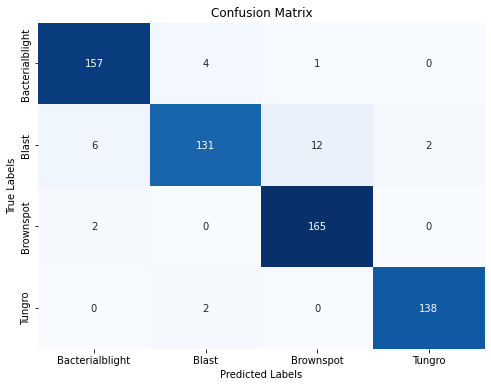

In [55]:
# Generate confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [24]:
resnet_model = tf.keras.applications.ResNet50(input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS),
                                               weights=None,
                                               classes=NUM_CLASSES)

In [25]:
resnet_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [13]:
history_resnet = resnet_model.fit(train_ds, validation_data=val_ds, epochs=EPOCHS)

Epoch 1/10
148/148 [==============================] - 1890s 13s/step - loss: 0.8016 - accuracy: 0.7485 - val_loss: 7.5640 - val_accuracy: 0.4722
Epoch 2/10
148/148 [==============================] - 1902s 13s/step - loss: 0.4419 - accuracy: 0.8459 - val_loss: 5.2274 - val_accuracy: 0.4080
Epoch 3/10
148/148 [==============================] - 2092s 14s/step - loss: 0.4010 - accuracy: 0.8651 - val_loss: 44.3539 - val_accuracy: 0.3993
Epoch 4/10
148/148 [==============================] - 2185s 15s/step - loss: 0.2937 - accuracy: 0.8938 - val_loss: 0.8187 - val_accuracy: 0.8056
Epoch 5/10
148/148 [==============================] - 2300s 15s/step - loss: 0.2223 - accuracy: 0.9166 - val_loss: 1.7401 - val_accuracy: 0.6545
Epoch 6/10
148/148 [==============================] - 2017s 14s/step - loss: 0.1517 - accuracy: 0.9462 - val_loss: 1.3858 - val_accuracy: 0.7205
Epoch 7/10
148/148 [==============================] - 2153s 14s/step - loss: 0.1532 - accuracy: 0.9478 - val_loss: 0.4297 - val_a

In [14]:
resnet_model.save(r"C:\Users\jagad\Resnet")

INFO:tensorflow:Assets written to: C:\Users\jagad\Resnet\assets


INFO:tensorflow:Assets written to: C:\Users\jagad\Resnet\assets


In [26]:
import numpy as np
resnet_model=tf.keras.models.load_model(r"C:\Users\jagad\Resnet")
test_loss, test_accuracy = resnet_model.evaluate(test_ds)

print('Test Accuracy:', test_accuracy)

# Make predictions on the test set
y_true = []
y_pred = []

for images, labels in test_ds:
    predictions = resnet_model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(predictions, axis=1))



20/20 [==============================] - 56s 2s/step - loss: 0.7389 - accuracy: 0.8274
Test Accuracy: 0.8274193406105042
1/1 [==============================] - 3s 3s/step


In [27]:
# Compute other evaluation metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report

precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')
accuracy = accuracy_score(y_true, y_pred)

print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)
print('Accuracy:', accuracy)

Precision: 0.8718104448742746
Recall: 0.8364304180598157
F1-score: 0.8341769960618348
Accuracy: 0.8306451612903226


In [28]:
class_names = ['Bacterialblight', 'Blast', 'Brownspot', 'Tungro']  # Add your class names
print(classification_report(y_true, y_pred, target_names=class_names))

                 precision    recall  f1-score   support

Bacterialblight       0.95      0.66      0.78       157
          Blast       0.63      0.98      0.77       151
      Brownspot       0.95      0.72      0.82       166
         Tungro       0.96      0.99      0.97       146

       accuracy                           0.83       620
      macro avg       0.87      0.84      0.83       620
   weighted avg       0.87      0.83      0.83       620



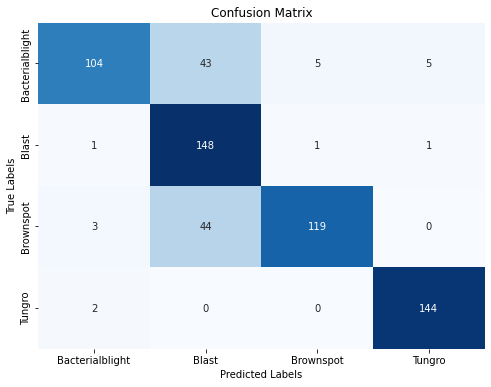

In [29]:
# Generate confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [30]:
inception_model = models.Sequential([
    resize_and_rescale,
    tf.keras.applications.InceptionV3(input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS),
                                      include_top=False,
                                      weights=None),
    layers.GlobalAveragePooling2D(),
    layers.Dense(64, activation='relu'),
    layers.Dense(NUM_CLASSES, activation='softmax')
])

In [31]:
inception_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [23]:
history_inception = inception_model.fit(train_ds, validation_data=val_ds, epochs=EPOCHS)

Epoch 1/10
148/148 [==============================] - 1076s 7s/step - loss: 0.6890 - accuracy: 0.7542 - val_loss: 3.5871 - val_accuracy: 0.2622
Epoch 2/10
148/148 [==============================] - 1050s 7s/step - loss: 0.5348 - accuracy: 0.7958 - val_loss: 1.5538 - val_accuracy: 0.5156
Epoch 3/10
148/148 [==============================] - 1058s 7s/step - loss: 0.4393 - accuracy: 0.8427 - val_loss: 1.0692 - val_accuracy: 0.6840
Epoch 4/10
148/148 [==============================] - 1052s 7s/step - loss: 0.3307 - accuracy: 0.8826 - val_loss: 0.3514 - val_accuracy: 0.8958
Epoch 5/10
148/148 [==============================] - 1053s 7s/step - loss: 0.2880 - accuracy: 0.8967 - val_loss: 2.0507 - val_accuracy: 0.6302
Epoch 6/10
148/148 [==============================] - 1056s 7s/step - loss: 0.2266 - accuracy: 0.9155 - val_loss: 0.2429 - val_accuracy: 0.9288
Epoch 7/10
148/148 [==============================] - 1063s 7s/step - loss: 0.1980 - accuracy: 0.9314 - val_loss: 0.8811 - val_accuracy:

In [24]:
inception_model.save(r"C:\Users\jagad\Inception")

INFO:tensorflow:Assets written to: C:\Users\jagad\Inception\assets


INFO:tensorflow:Assets written to: C:\Users\jagad\Inception\assets


In [32]:
inception_model=tf.keras.models.load_model(r"C:\Users\jagad\Inception")
test_loss, test_accuracy = inception_model.evaluate(test_ds)

print('Test Accuracy:', test_accuracy)

# Make predictions on the test set
y_true = []
y_pred = []

for images, labels in test_ds:
    predictions = inception_model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(predictions, axis=1))



20/20 [==============================] - 32s 1s/step - loss: 0.0923 - accuracy: 0.9645
Test Accuracy: 0.9645161032676697
1/1 [==============================] - 3s 3s/step


In [33]:
# Compute other evaluation metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report

precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')
accuracy = accuracy_score(y_true, y_pred)

print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)
print('Accuracy:', accuracy)

Precision: 0.9664285714285714
Recall: 0.9577205882352942
F1-score: 0.9603144428824053
Accuracy: 0.9612903225806452


In [34]:
class_names = ['Bacterialblight', 'Blast', 'Brownspot', 'Tungro']  # Add your class names
print(classification_report(y_true, y_pred, target_names=class_names))

                 precision    recall  f1-score   support

Bacterialblight       0.90      1.00      0.95       162
          Blast       1.00      0.94      0.97       153
      Brownspot       0.97      1.00      0.98       169
         Tungro       1.00      0.89      0.94       136

       accuracy                           0.96       620
      macro avg       0.97      0.96      0.96       620
   weighted avg       0.96      0.96      0.96       620



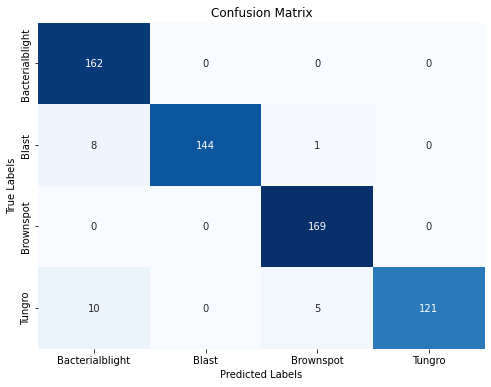

In [35]:
# Generate confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [48]:
inception_accuracy=inception_model.evaluate(test_ds)

20/20 [==============================] - 30s 1s/step - loss: 0.1133 - accuracy: 0.9532


In [49]:
inc_acc=inception_accuracy[1]

In [38]:
simple_cnn_accuracy=simple_cnn.evaluate(test_ds)

20/20 [==============================] - 12s 352ms/step - loss: 0.0903 - accuracy: 0.9774


In [39]:
cnn_acc=simple_cnn_accuracy[1]

In [56]:
lenet_accuracy=lenet_model.evaluate(test_ds)

20/20 [==============================] - 8s 169ms/step - loss: 0.1428 - accuracy: 0.9500


In [57]:
lenet_acc=lenet_accuracy[1]

In [42]:
resnet_accuracy=resnet_model.evaluate(test_ds)

20/20 [==============================] - 54s 2s/step - loss: 0.6753 - accuracy: 0.8419


In [43]:
resnet_Acc=resnet_accuracy[1]

In [50]:
import pandas as pd
models=["Simple_cnn","Lenet","Resnet","Inception"]
accuracies=[cnn_acc,lenet_acc,resnet_Acc,inc_acc]
comp_df=pd.DataFrame({'Accuracy':accuracies},index=models)

<Figure size 576x432 with 0 Axes>

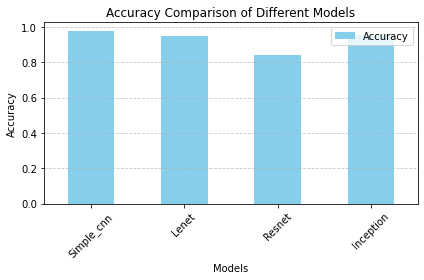

In [60]:
import matplotlib.pyplot as plt

# Bar Plot
plt.figure(figsize=(8, 6))
comp_df.plot(kind='bar', color='skyblue')
plt.title('Accuracy Comparison of Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()